## HW

Задания:

- Не все счета успешно доходят до оплаты. Необходимо выяснить, где они останавливаются и почему.

- Определить лишние операции в процессе, определить топ сотрудников, их совершающих и время, затраченное на эти действия

- В процессе производятся излишние (повторные проверки). Определить причины повторов и излишние затраты времени на них

Дедлайн: 24 октября, 9:30.

In [38]:
import pandas as pd
import dataframe_image as dfi

In [39]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Часть 0: Подготовка данных

## Описание датасета

Собраны данные примерно за два года.

Счета бывают двух типов: оплата возмещения сотруднику и счёт перед юр. лицом.

**'Экземпляр'** - id счёта

**'Операция'** - тип операции, проведённой над счётом. Всего 15 типов.

**'Дата начала'** - дата начала операции. Самая ранняя: 2021-01-07 02:49:12', поздняя: '2022-12-06 23:42:17'

**'Тип операции'** - тип операции: ['Получение', 'Согласование', 'Платеж', 'Сбор данных']

**'Стоимость активности'** - стоимость операции

**'Сумма'** - сумма счёта

**'Автоматизация'** - тип операции: ['Автоматизированная', 'Ручная']

**'Ответственный'** - ФИО сотрудника

**'Статус счета'** - статус: ['Закрыт', 'В процессе']

**'Тип счета'** - тип счёта по размеру и категории поставщика: ['Счет на малую сумму', 'Счет на среднюю сумму', 'Доверенный поставщик', 'Авансовый отчет', 'Партнер', 'Счет на большую сумму']

**'Регион'** - регион принятия решения по данному типу конкретной операции

**'Клиент'** - ФИО клиента

**'Тип клиента'** - тип клиента: ['Обычный клиент', 'Импульсивный клиент', 'Клиент со скидкой', 'Внутренний клиент', 'Партнер']

**'Поставщик'** - юр. имя поставщика

**'Тип поставщика'** - тип поставщика (в основном 'Производственное оборудование'): ['Производственное оборудование', 'Инженерное оборудование', 'Сотрудники', 'Офисные принадлежности']

**'Отдел'** - отдел принятия решения по данному типу конкретной операции, в основном 'Внутренний контроль'

**'Пользователь'** - тот, кто принимал решение на данном этапе оплаты счёта

**'Путь'** - 357 уникальных путей. Это тип цепочки событий процесса.

**'Тип пути'** - алгоритм выплаты счёта


In [40]:
data = pd.read_csv('2_Оплата счетов.csv', encoding='cp1251', sep=';')
data['Дата начала'] = pd.to_datetime(data['Дата начала'], format='%d.%m.%Y %H:%M:%S')
print(data.shape)
data.head()

(133452, 19)


,Экземпляр,Операция,Дата начала,Тип операции,Стоимость активности,Сумма,Автоматизация,Ответственный,Статус счета,Тип счета,Регион,Клиент,Тип клиента,Поставщик,Тип поставщика,Отдел,Пользователь,Путь,Тип пути
0,IF-1506417,A. Получение счета,2021-06-27 10:00:23,Получение,0,10 тыс. - 100 тыс.,Автоматизированная,Варлаам Матвеевич Орехов,Закрыт,Счет на малую сумму,Центральный ФО,Антонина Алексеевна Красильникова,Обычный клиент,РАО «Лаврентьева-Иванов»,Производственное оборудование,Автоматическая обработка,Система,Variant 1,Обычный счет
1,IF-1506417,C. Проверка счета,2021-06-27 10:00:25,Получение,0,10 тыс. - 100 тыс.,Ручная,Варлаам Матвеевич Орехов,Закрыт,Счет на малую сумму,Уральский ФО,Антонина Алексеевна Красильникова,Обычный клиент,РАО «Лаврентьева-Иванов»,Производственное оборудование,Финансы,Варлаам Матвеевич Орехов,Variant 1,Обычный счет
2,IF-1506417,G. Финальная проверка счета,2021-06-27 10:41:50,Согласование,0,10 тыс. - 100 тыс.,Ручная,Варлаам Матвеевич Орехов,Закрыт,Счет на малую сумму,Дальневосточный ФО,Антонина Алексеевна Красильникова,Обычный клиент,РАО «Лаврентьева-Иванов»,Производственное оборудование,Другое,Яковлева Елизавета Робертовна,Variant 1,Обычный счет
3,IF-1506417,H. Согласование,2021-06-28 10:10:55,Согласование,0,10 тыс. - 100 тыс.,Ручная,Варлаам Матвеевич Орехов,Закрыт,Счет на малую сумму,Дальневосточный ФО,Антонина Алексеевна Красильникова,Обычный клиент,РАО «Лаврентьева-Иванов»,Производственное оборудование,Другое,Рогова Валерия Львовна,Variant 1,Обычный счет
4,IF-1506417,N. Оплата счета,2021-07-01 17:01:47,Платеж,0,10 тыс. - 100 тыс.,Ручная,Варлаам Матвеевич Орехов,Закрыт,Счет на малую сумму,Уральский ФО,Антонина Алексеевна Красильникова,Обычный клиент,РАО «Лаврентьева-Иванов»,Производственное оборудование,Финансы,Варлаам Матвеевич Орехов,Variant 1,Обычный счет


Рассмотрим путь какой-то заявки

In [41]:
print(check_data.iloc[:, :4].to_latex(index=False))

\begin{tabular}{llll}
\toprule
 Экземпляр &                    Операция &         Дата начала & Тип операции \\
\midrule
IF-1506417 &          A. Получение счета & 2021-06-27 10:00:23 &    Получение \\
IF-1506417 &           C. Проверка счета & 2021-06-27 10:00:25 &    Получение \\
IF-1506417 & G. Финальная проверка счета & 2021-06-27 10:41:50 & Согласование \\
IF-1506417 &             H. Согласование & 2021-06-28 10:10:55 & Согласование \\
IF-1506417 &             N. Оплата счета & 2021-07-01 17:01:47 &       Платеж \\
\bottomrule
\end{tabular}



In [42]:
check_data = data[data['Экземпляр'] == 'IF-1506417'].copy().sort_values(by='Дата начала', ascending=True)
check_data

,Экземпляр,Операция,Дата начала,Тип операции,Стоимость активности,Сумма,Автоматизация,Ответственный,Статус счета,Тип счета,Регион,Клиент,Тип клиента,Поставщик,Тип поставщика,Отдел,Пользователь,Путь,Тип пути
0,IF-1506417,A. Получение счета,2021-06-27 10:00:23,Получение,0,10 тыс. - 100 тыс.,Автоматизированная,Варлаам Матвеевич Орехов,Закрыт,Счет на малую сумму,Центральный ФО,Антонина Алексеевна Красильникова,Обычный клиент,РАО «Лаврентьева-Иванов»,Производственное оборудование,Автоматическая обработка,Система,Variant 1,Обычный счет
1,IF-1506417,C. Проверка счета,2021-06-27 10:00:25,Получение,0,10 тыс. - 100 тыс.,Ручная,Варлаам Матвеевич Орехов,Закрыт,Счет на малую сумму,Уральский ФО,Антонина Алексеевна Красильникова,Обычный клиент,РАО «Лаврентьева-Иванов»,Производственное оборудование,Финансы,Варлаам Матвеевич Орехов,Variant 1,Обычный счет
2,IF-1506417,G. Финальная проверка счета,2021-06-27 10:41:50,Согласование,0,10 тыс. - 100 тыс.,Ручная,Варлаам Матвеевич Орехов,Закрыт,Счет на малую сумму,Дальневосточный ФО,Антонина Алексеевна Красильникова,Обычный клиент,РАО «Лаврентьева-Иванов»,Производственное оборудование,Другое,Яковлева Елизавета Робертовна,Variant 1,Обычный счет
3,IF-1506417,H. Согласование,2021-06-28 10:10:55,Согласование,0,10 тыс. - 100 тыс.,Ручная,Варлаам Матвеевич Орехов,Закрыт,Счет на малую сумму,Дальневосточный ФО,Антонина Алексеевна Красильникова,Обычный клиент,РАО «Лаврентьева-Иванов»,Производственное оборудование,Другое,Рогова Валерия Львовна,Variant 1,Обычный счет
4,IF-1506417,N. Оплата счета,2021-07-01 17:01:47,Платеж,0,10 тыс. - 100 тыс.,Ручная,Варлаам Матвеевич Орехов,Закрыт,Счет на малую сумму,Уральский ФО,Антонина Алексеевна Красильникова,Обычный клиент,РАО «Лаврентьева-Иванов»,Производственное оборудование,Финансы,Варлаам Матвеевич Орехов,Variant 1,Обычный счет


Видим, что по обработка заявки заняла 4 дня и 7 часов. В обработке участвовало 3 сотрудника.

Обработка одного платежа имеет множество этапов, проходит согласование у разных сотрудников на разных уровнях и в разных регионах. В данной ситуации различных комбинаций путей заявки слишком много, так что задачу оптимизации не решить методом "пристального взгляда" на гистограмму.

# Часть 1: Поиск причин неоплаченных заявок

Для нахождения слабого звена в процессе оплаты счетов я воспользуюсь библиотекой SberPM.

In [43]:
from sberpm import DataHolder
from sberpm.miners import HeuMiner, SimpleMiner
from sberpm.visual import GraphvizPainter
from sberpm.metrics import ActivityMetric, IdMetric, TraceMetric, TransitionMetric, UserMetric

In [44]:
data_holder = DataHolder(
    data='2_Оплата счетов.csv',
    id_column='Экземпляр',
    activity_column='Операция',
    start_timestamp_column='Дата начала',
    user_column='Пользователь',
    time_format='%d.%m.%Y %H:%M:%S',
    encoding='cp1251',
    sep=';'
)

Далее будем работать с цепочками операций.

In [45]:
trace_metric = TraceMetric(data_holder, time_unit='h')
traces = trace_metric.apply().sort_values('count', ascending=False).reset_index()
traces[['index', 'mean_duration', 'count']].head()

,index,mean_duration,count
0,"(A. Получение счета, C. Проверка счета, G. Фин...",109.705542,8269
1,"(A. Получение счета, C. Проверка счета, F. Про...",132.137140,2440
2,"(A. Получение счета, K. Оплата возмещения сотр...",0.000935,2305
3,"(A. Получение счета, C. Проверка счета, D. Зап...",138.033206,2242
4,"(A. Получение счета, C. Проверка счета, D. Зап...",286.504418,1827


На данном этапе видим частую пятую по частотности цепочку, у которой присутствует цикл и которая занимает почти в 3 раза больше времени.

Рассмотрим цепочки, которые не завершились оплатой.

In [59]:
not_paid = traces[traces['index'].apply(
    lambda x: 'N. Оплата счета' not in x 
    and 'K. Оплата возмещения сотруднику' not in x
    and 'B. Контрагент не существует' not in x
)]
dfi.export(not_paid.iloc[:, :5].reset_index(drop=True), 'report/images/not_paid.png')
not_paid

,index,count,ids,trace_length,unique_activities_num,loop_percent,unique_users,unique_users_num,total_duration,mean_duration,median_duration,max_duration,min_duration,variance_duration,std_duration
7,"(A. Получение счета, C. Проверка счета)",529,"{IF-1507819, IF-1512735, IF-1504335, IF-160086...",2,2,0.0,"{Макаров Измаил Брониславович, Нинель Антоновн...",5,0.215000,0.000406,0.000278,0.001944,0.000000,0.000107,0.000172
109,"(A. Получение счета, J. Пост-обработка счета)",3,"{IF-1609640, IF-1604375, IF-1506373}",2,2,0.0,"{Система, Кондрат Григорьевич Ковалев}",2,0.000556,0.000185,0.000278,0.000278,0.000000,0.000062,0.000131
122,"(A. Получение счета, M. Обработка счета)",3,"{IF-1503173, IF-1504556, IF-1503174}",2,2,0.0,"{Фока Юлианович Трофимов, Система}",2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
136,"(A. Получение счета, C. Проверка счета, J. Пос...",2,"{IF-1609219, IF-1609220}",4,3,25.0,"{Кондрат Григорьевич Ковалев, Система, Ермил З...",3,0.081667,0.040833,0.040833,0.058611,0.023056,1.137778,0.017778
344,"(A. Получение счета, C. Проверка счета, J. Пос...",1,{IF-1610820},5,3,40.0,"{Ольга Юльевна Филатова, Система, Ермил Зиновь...",4,263.111944,263.111944,263.111944,263.111944,263.111944,0.000000,0.000000


Видим повторяющиеся фамилии. На данном этапе есть две гипотезы:
- сотрудники систематически не закрывают оплату счёта
- через этих сотрудников проходит значительный поток платежей, в том числе и не оплаченных

Для дальнейшего расследования рассмотрим самый популярный сценарий обработки заявки, не дошедший до платежа.

In [47]:
suspicious_ids = traces.loc[7, 'ids']
suspicious_data = data[data['Экземпляр'].apply(lambda x: x in suspicious_ids)].copy()
suspicious_data.head()

,Экземпляр,Операция,Дата начала,Тип операции,Стоимость активности,Сумма,Автоматизация,Ответственный,Статус счета,Тип счета,Регион,Клиент,Тип клиента,Поставщик,Тип поставщика,Отдел,Пользователь,Путь,Тип пути
662,IF-1506532,A. Получение счета,2021-06-27 16:32:39,Получение,0,10 тыс. - 100 тыс.,Автоматизированная,NaN,В процессе,Счет на малую сумму,Центральный ФО,Кулагин Валерий Фомич,Импульсивный клиент,ГВСУ по специальным объектам,Инженерное оборудование,Автоматическая обработка,Система,Variant 8,Согласование не требуется
663,IF-1506532,C. Проверка счета,2021-06-27 16:32:41,Получение,0,10 тыс. - 100 тыс.,Ручная,NaN,В процессе,Счет на малую сумму,Уральский ФО,Кулагин Валерий Фомич,Импульсивный клиент,ГВСУ по специальным объектам,Инженерное оборудование,Руководство,Кондрат Григорьевич Ковалев,Variant 8,Согласование не требуется
1214,IF-1512122,A. Получение счета,2021-06-28 14:34:13,Получение,0,100 тыс. - 1 млн,Автоматизированная,NaN,В процессе,Счет на среднюю сумму,Центральный ФО,Юрий Герасимович Щербаков,Обычный клиент,НПО «Некрасова-Дроздова»,Производственное оборудование,Автоматическая обработка,Система,Variant 8,Согласование не требуется
1215,IF-1512122,C. Проверка счета,2021-06-28 14:34:14,Получение,0,100 тыс. - 1 млн,Ручная,NaN,В процессе,Счет на среднюю сумму,Уральский ФО,Юрий Герасимович Щербаков,Обычный клиент,НПО «Некрасова-Дроздова»,Производственное оборудование,Руководство,Кондрат Григорьевич Ковалев,Variant 8,Согласование не требуется
1571,IF-1506698,A. Получение счета,2021-07-01 11:30:21,Получение,0,100 тыс. - 1 млн,Автоматизированная,NaN,В процессе,Счет на среднюю сумму,Центральный ФО,Ульяна Аркадьевна Овчинникова,Обычный клиент,Профитмед,Производственное оборудование,Автоматическая обработка,Система,Variant 8,Согласование не требуется


In [48]:
suspicious_data['Ответственный'].isna().sum() == suspicious_data.shape[0]

True

На всех заявках не был назначен ответственный. 

Рассмотрим пользователей, на которых останавливались заявки. 

In [49]:
suspicious_data['Пользователь'].value_counts()

Система                           529
Кондрат Григорьевич Ковалев       525
Макаров Измаил Брониславович        2
Эмилия Константиновна Суворова      1
Нинель Антоновна Кудряшова          1
Name: Пользователь, dtype: int64

In [50]:
data[data['Пользователь'] == 'Кондрат Григорьевич Ковалев'].shape

(1004, 19)

Разберёмся, как в принципе проходили платежи через этого сотрудника. Для этого соберём все счета, проходившие через него и визуализируем на графе со временными и количественными метриками. 

In [51]:
user_metric = UserMetric(data_holder, time_unit='h')
checks_with_him_ids = user_metric.apply().loc['Кондрат Григорьевич Ковалев', 'unique_ids']

data_with_him = data[data['Экземпляр'].apply(lambda x: x in checks_with_him_ids)]

suspicious_data_holder = DataHolder(
    data=data_with_him,
    id_column='Экземпляр',
    activity_column='Операция',
    start_timestamp_column='Дата начала',
    user_column='Пользователь',
)

In [52]:
def visualize_process(data_holder, miner, save_path=None):
    """Create GraphvizPainter object to plot process
    Args:
        data_holder: DataHolder object
        miner: miner used to create graph
        save_path: path to save plot
    Returns: graph painter 
    """
    activity_metric = ActivityMetric(data_holder, time_unit='h')
    transition_metric = TransitionMetric(data_holder, time_unit='h')

    edges_count_metric = transition_metric.count().to_dict()

    nodes_count_metric = activity_metric.count().to_dict()
    edges_count_metric = transition_metric.count().to_dict()
    mean_time_node_metric = activity_metric.mean_duration().fillna(0).to_dict()

    miner.apply()
    graph = miner.graph

    graph.add_node_metric('count', nodes_count_metric)
    graph.add_edge_metric('count', edges_count_metric)
    graph.add_node_metric('mean_time', mean_time_node_metric)

    painter = GraphvizPainter()
    painter.apply(graph, node_style_metric='count', edge_style_metric='count')
    if save_path:
        painter.write_graph(save_path, format='png')
    return painter

In [53]:
painter = visualize_process(suspicious_data_holder, SimpleMiner(suspicious_data_holder), 'report/images/suspicious_metric_graph.png')
painter.show()

In [54]:
# заодно сохраним, как выглядит процесс в общем
painter = visualize_process(data_holder, HeuMiner(data_holder, threshold=0.8), 'report/images/metric_graph.png')

## Выводы

По какой-то причине руководитель не назначал ответственного за оплату и счета останавливались на этапе проверки или финального согласования. 

## Часть 2: Поиск лишних операций

Для выявления лишних операций и сотрудников, которые их выполняют предлагается выполнить следующие действия:

1. выделить признаки, характеризующие каждый чек (объект) на всех этапах его обработки в общем. Важно не использовать признаки, отвечающие за то, какие этапы и через кого проходил объект;
2. сопоставить каждому объекту время, затраченное на его обработку;
2. векторизовать выбранные признаки;
3. кластеризовать объекты;
4. в каждом кластере выбрать самые долгие по времени обработки объекты, сравнить их обработку с другими объектами;
5. выделить сотрудников, выполнявших эти лишние действия, и посчитать затраченное время.

Таким образом можно выделить похожие платежи и выделить лишние действия. 

In [60]:
from scipy.sparse.linalg import svds
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
import numpy as np

categorical_small = ['Сумма', 'Тип счета', 'Тип клиента', 'Тип поставщика', 'Тип пути']
categorical_large = ['Клиент', 'Поставщик']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_small),
    ('te', OneHotEncoder(handle_unknown='ignore'), categorical_large),
])

vectors = column_transformer.fit_transform(data.drop_duplicates(subset='Экземпляр')[categorical_small + categorical_large])

Сначала понизим размерность с помощью SVD до 10, потом применим TSNE. Визуализируем, чтобы оценить число кластеров.

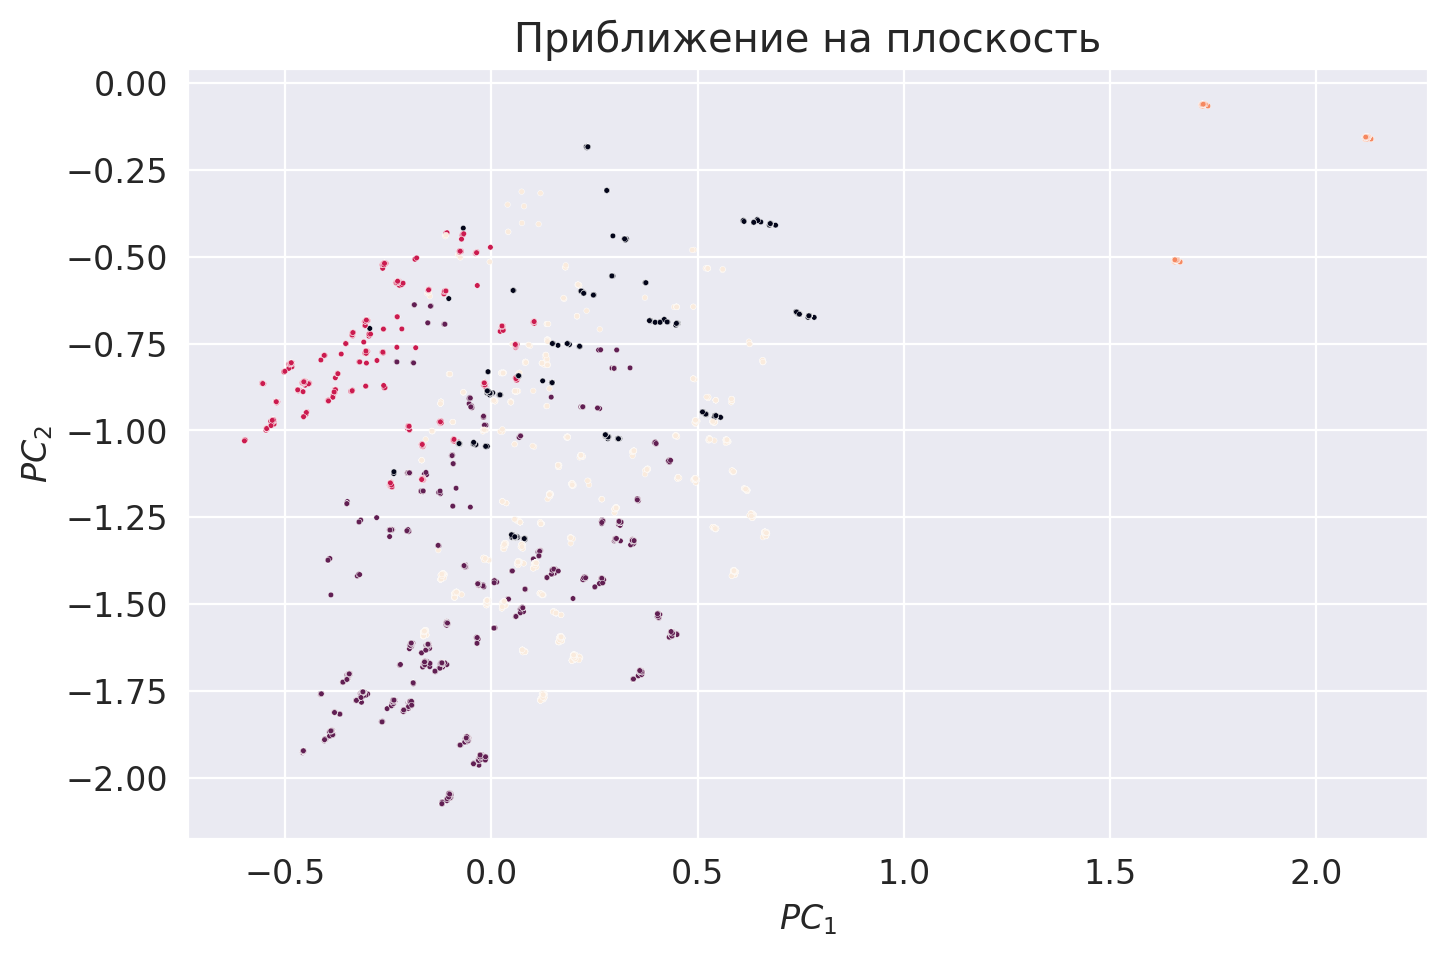

In [67]:
U, S, VT = svds(vectors, k=100, random_state=1)
points = U @ np.diag(S)
clusters = KMeans(n_init=10, random_state=1, n_clusters=5).fit_predict(points)

U, S, VT = svds(vectors, k=2, random_state=1)
points = U @ np.diag(S)

sns.scatterplot(x=points[:, 0], y=points[:, 1], s=4, c=clusters)

plt.xlabel("$PC_1$")
plt.ylabel("$PC_2$")
plt.title('Приближение на плоскость')
plt.savefig('report/images/checks_proj.png');

In [19]:
id_metric = IdMetric(data_holder, time_unit='h')
metrics = id_metric.apply()
metrics['cluster'] = clusters

- проходим по всем кластерам, рассматриваем плохие объекты (выходящие за 3 сигмы)

- по хорошим объектам ищем счастливый путь как самую частую последовательность

- смотрим, как путь плохих объектов отличается от счастливого и записываем лишние действия (с сотрудниками и затраченным временем) 

In [20]:
for cluster in np.unique(clusters):
    cluster_data = metrics[metrics['cluster'] == cluster]
    duration = cluster_data['total_duration'].to_numpy()
    np.std(duration) * 3
    

In [21]:
def get_excessive_stats(excessive_data: pd.DataFrame, happy_path):
    excessive_data_holder = DataHolder(
        data=excessive_data,
        id_column='Экземпляр',
        activity_column='Операция',
        start_timestamp_column='Дата начала',
        user_column='Пользователь',
    )

    activity_metric = ActivityMetric(excessive_data_holder, time_unit='h').apply()
    excessive_data = excessive_data.copy().sort_values(by='Дата начала')
    ptr = 0
    excessive_stages = []
    excessive_time = []
    excessive_users = []
    for idx, row in excessive_data.iterrows():
        stage = row['Операция']
        if ptr >= len(happy_path) or stage != happy_path[ptr]:
            excessive_stages.append(stage)
            excessive_time.append(activity_metric.loc[stage, 'mean_duration'])
            excessive_users.append(row['Пользователь'])
        else:
            ptr += 1
    return pd.DataFrame({
        'excessive_stages': excessive_stages,
        'excessive_time': excessive_time,
        'excessive_users': excessive_users,
    })

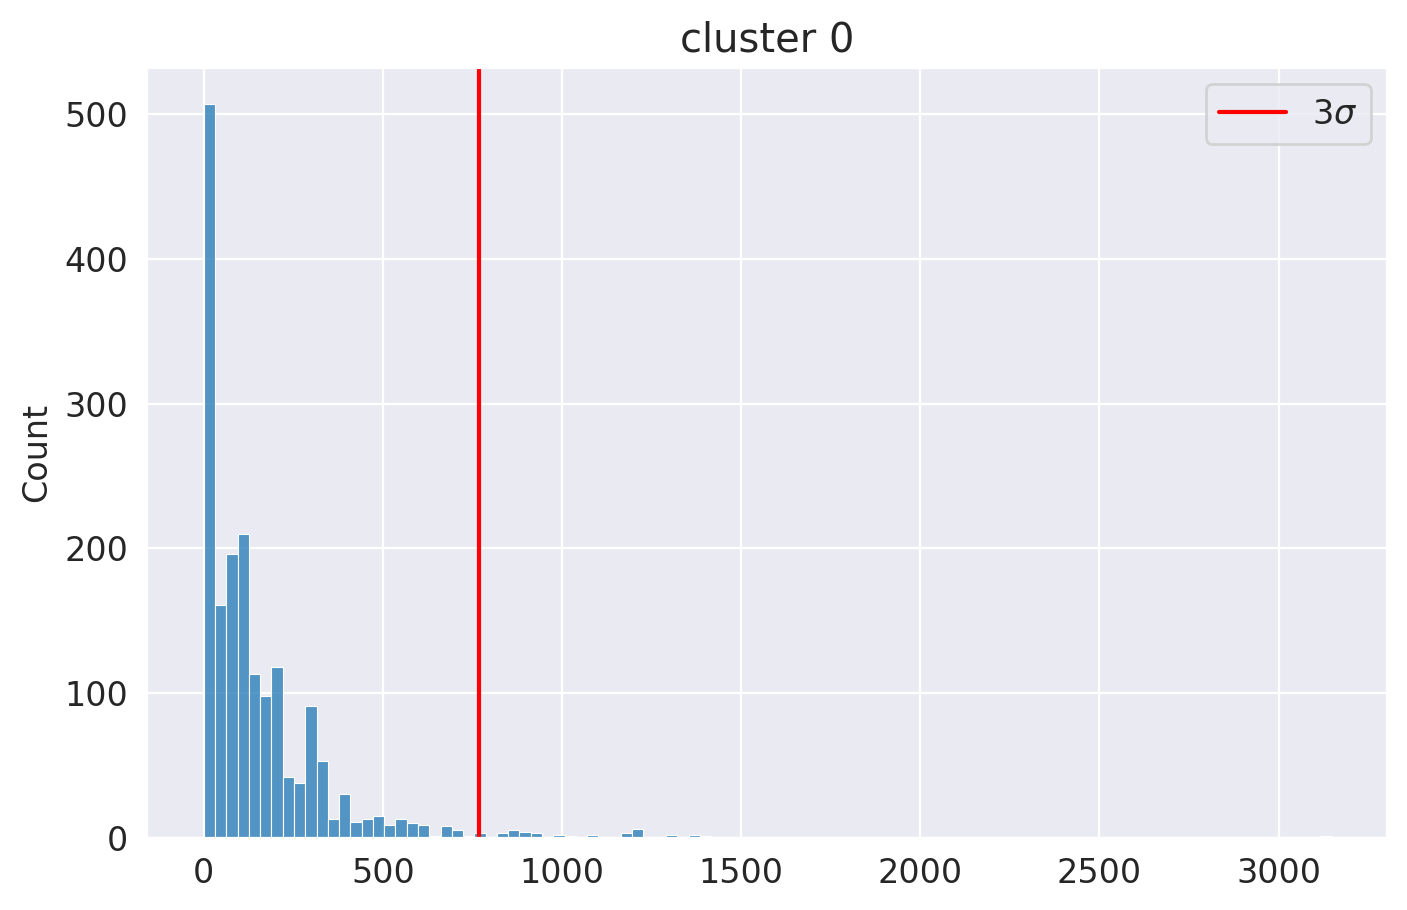

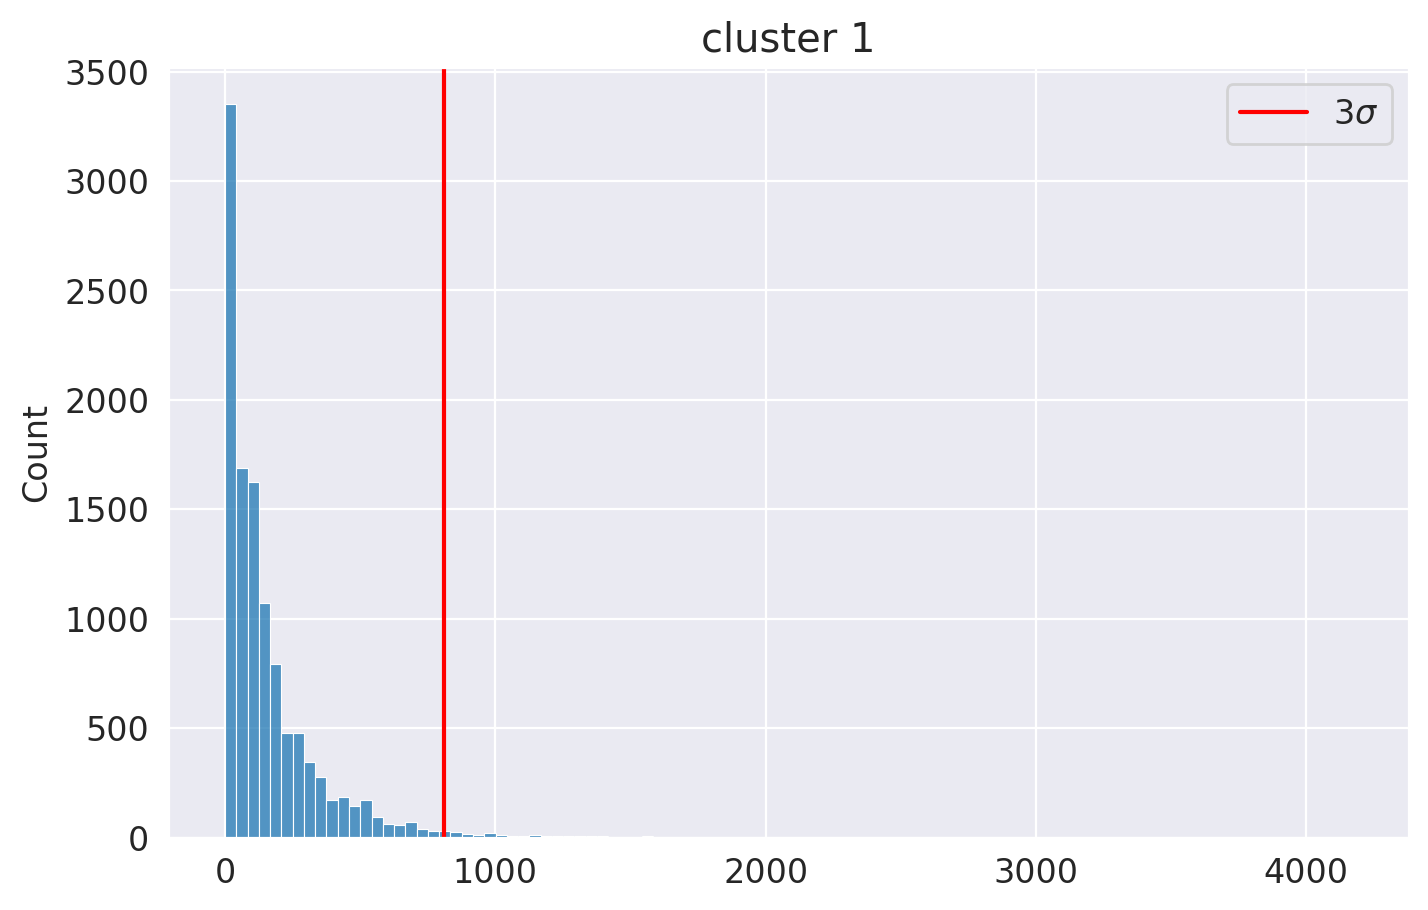

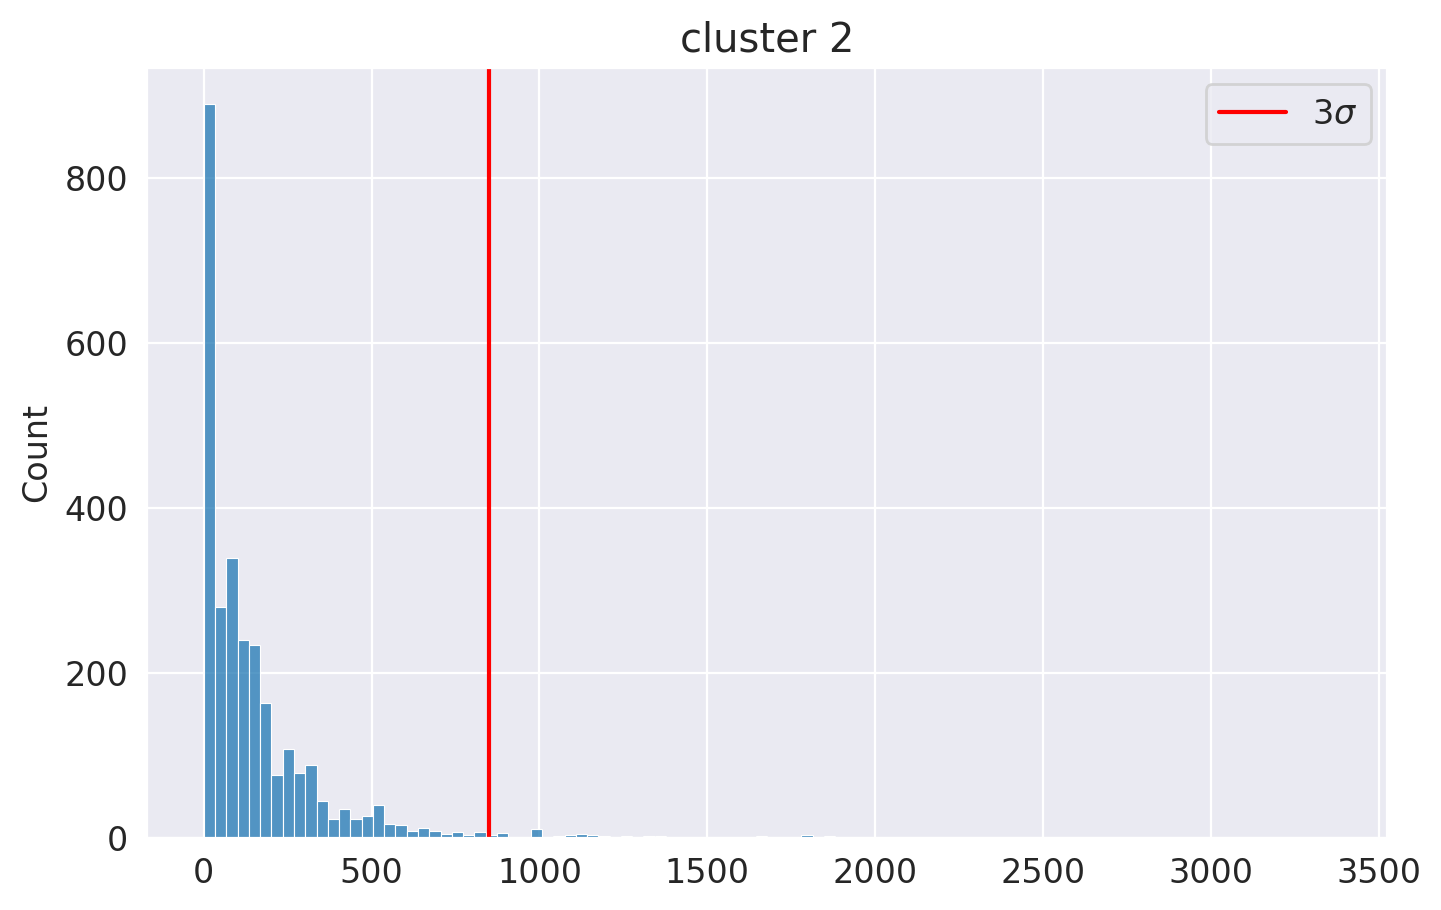

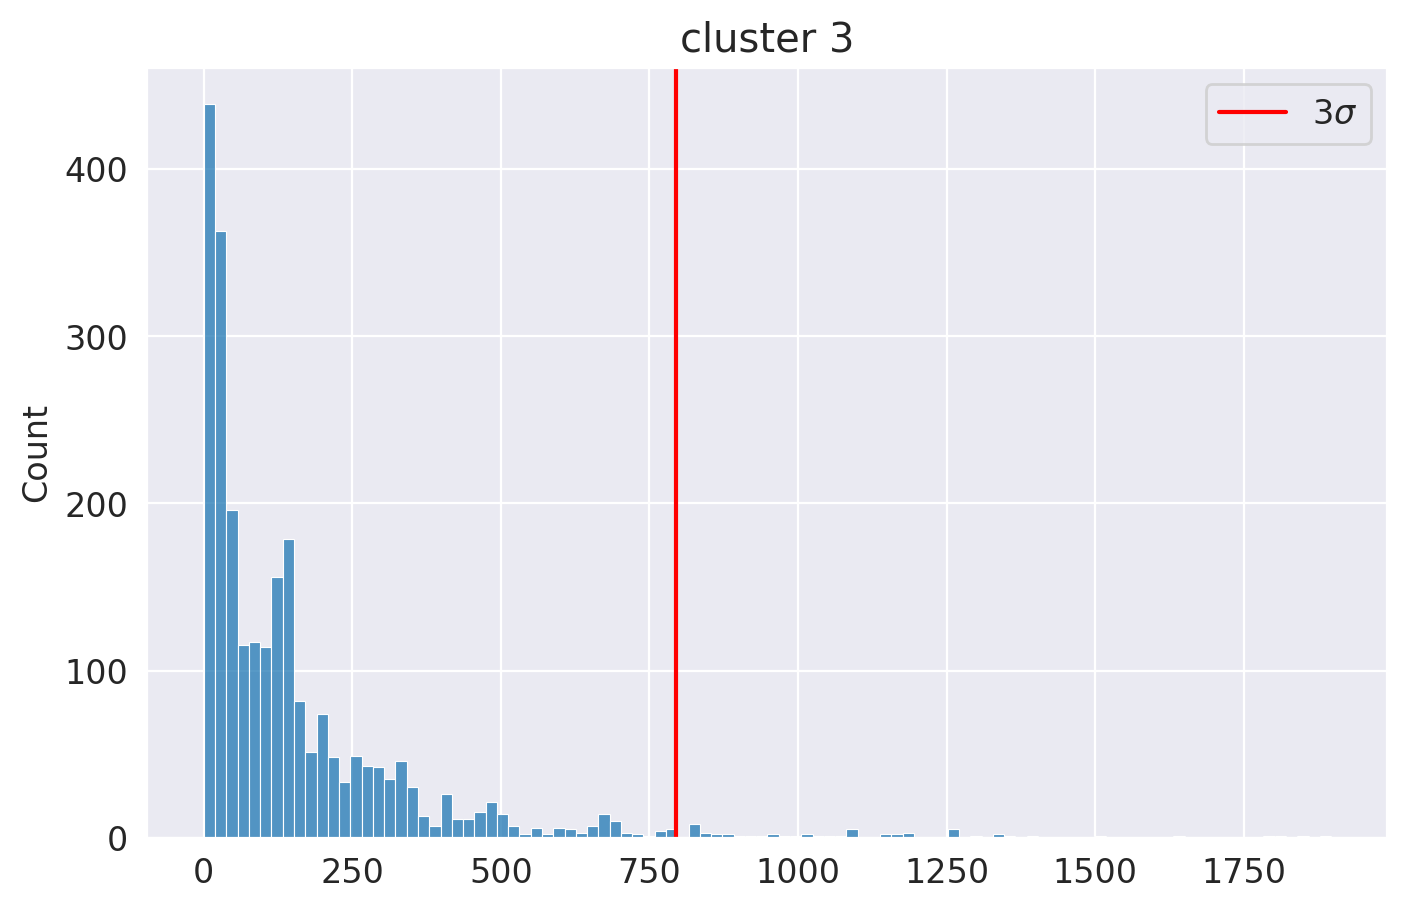

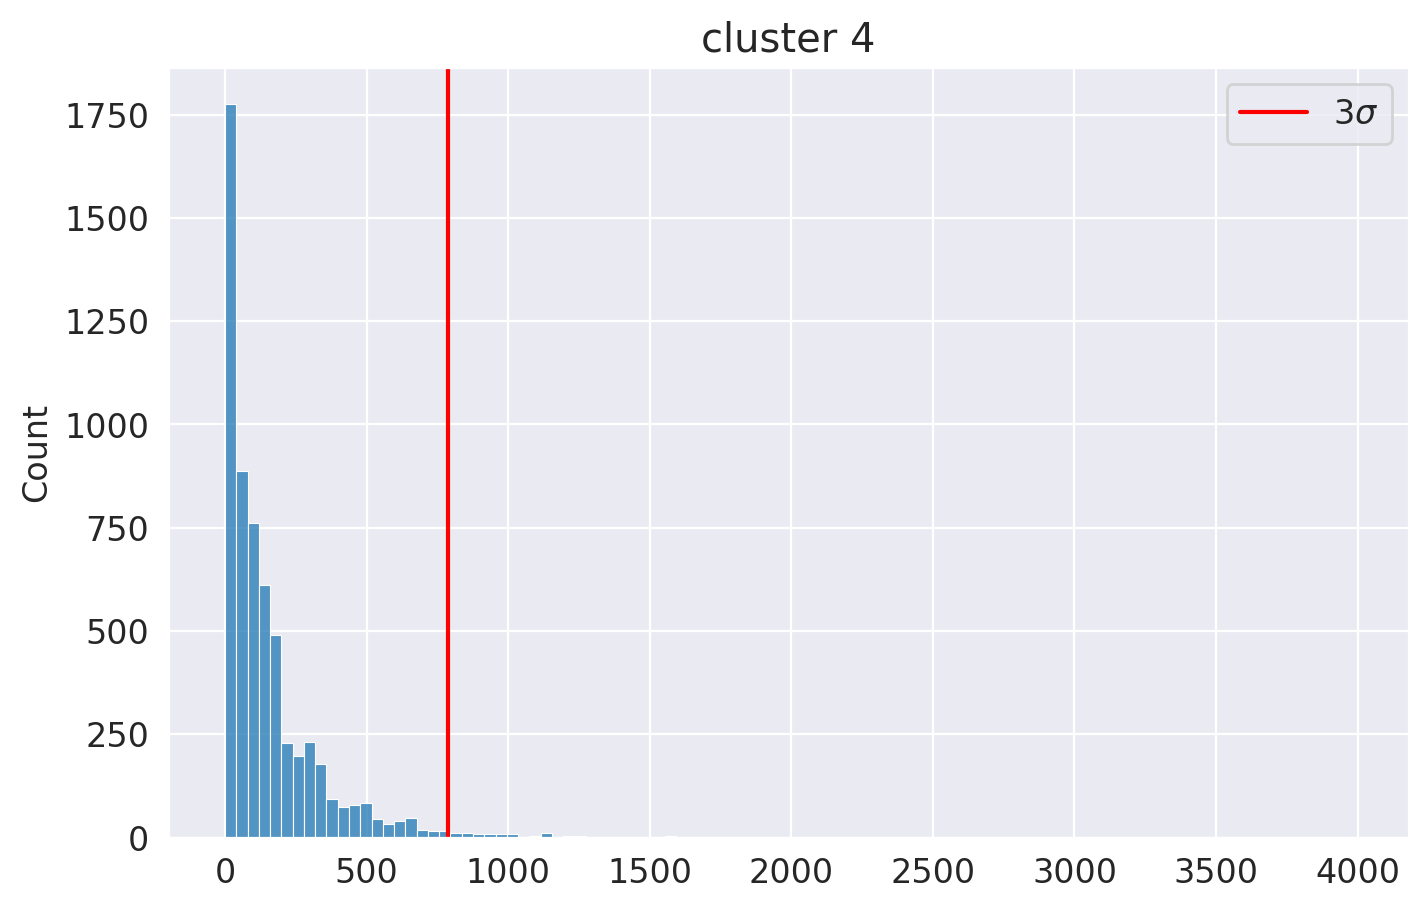

,excessive_time,excessive_stages
excessive_users,,
Ковалева Надежда Оскаровна,1062.090247,9
Белякова Антонина Юльевна,1055.748839,14
Зиновьева Майя Макаровна,887.343207,11
Ипатий Адрианович Ефимов,476.295139,1
Глеб Валерианович Журавлев,325.766429,2


In [22]:
excessive_stages = []
for cluster in np.unique(clusters):
    cluster_data = metrics[metrics['cluster'] == cluster]
    happy_path = cluster_data['trace'].mode().item()
    duration = cluster_data['total_duration'].to_numpy()
    std_3 = np.mean(duration) + np.std(duration) * 3

    for id in cluster_data[cluster_data['total_duration'] > std_3].index.to_list():
        id_data = data[data['Экземпляр'] == id]
        excessive_stages.append(get_excessive_stats(id_data, happy_path))

    plt.axvline(x=std_3, color='red', label='$3 \sigma$')
    sns.histplot(duration, bins=100)
    plt.title(f'cluster {cluster}')
    plt.legend()
    plt.show()

excessive_stages = pd.concat(excessive_stages, axis=0)
excessive_grouped = excessive_stages.groupby('excessive_users').agg({'excessive_time': 'mean', 'excessive_stages': 'count'})
excessive_grouped.sort_values(by='excessive_time', ascending=False).head()

In [68]:
print(excessive_grouped.sort_values(by='excessive_time', ascending=False).head().to_latex())

\begin{tabular}{lrr}
\toprule
{} &  excessive\_time &  excessive\_stages \\
excessive\_users            &                 &                   \\
\midrule
Ковалева Надежда Оскаровна &     1062.090247 &                 9 \\
Белякова Антонина Юльевна  &     1055.748839 &                14 \\
Зиновьева Майя Макаровна   &      887.343207 &                11 \\
Ипатий Адрианович Ефимов   &      476.295139 &                 1 \\
Глеб Валерианович Журавлев &      325.766429 &                 2 \\
\bottomrule
\end{tabular}



# Часть 3: Поиск повторных проверок.

Рассмотрим причины зацикливания на самых частых путях с loop_percent > 25.

In [23]:
most_looped = traces.loc[traces['loop_percent'] > 25]
most_looped = most_looped.  sort_values(by='count', ascending=False)
most_looped.head(2)

,index,count,ids,trace_length,unique_activities_num,loop_percent,unique_users,unique_users_num,total_duration,mean_duration,median_duration,max_duration,min_duration,variance_duration,std_duration
10,"(A. Получение счета, C. Проверка счета, G. Фин...",259,"{IF-1610383, IF-1605218, IF-1506230, IF-160496...",7,5,28.571429,"{Мартынова Анжела Максимовна, Мамонтова София ...",194,100661.828611,388.655709,413.673611,786.485833,4.126667,1.063289e+08,171.859863
11,"(A. Получение счета, C. Проверка счета, G. Фин...",211,"{IF-1507029, IF-1504738, IF-1601466, IF-160015...",7,5,28.571429,"{Мартынова Анжела Максимовна, Мамонтова София ...",192,32262.575278,152.903200,139.210278,577.063333,3.215000,3.884773e+07,103.879913


Визуализируем самые частые циклы.

In [24]:
looped_ids = set()
for ids in most_looped['ids'].to_list():
    for id in ids:
        looped_ids.add(id)

looped_data = data[data['Экземпляр'].apply(lambda x: x in looped_ids)]
looped_data_holder = DataHolder(
    data=looped_data,
    id_column='Экземпляр',
    activity_column='Операция',
    start_timestamp_column='Дата начала',
    user_column='Пользователь',
)

In [25]:
painter = visualize_process(looped_data_holder, HeuMiner(looped_data_holder, threshold=0.8))
painter.save('report/images/looped_metric_graph.png', 'png')
painter.show()

Большинство зацикливаний происходит на этапе финальной проверки счёта. Счета отправляются на повторной проверке условий, либо передаются другому пользователю для финальной проверки.

Для оценки времени, затраченного на циклы я просто умножу коэффициент зацикленности на среднее время выполнения цепочки операций, то есть по формуле: $count \times loop\_percent \times mean\_duration$

In [26]:
total_loops_time = (traces['count'] * traces['loop_percent'] / 100 * traces['mean_duration']).sum() / 24
total_loops_time

24959.215152060027

In [27]:
total_time = traces.total_duration.sum() / 24
total_time

163007.7648611111

In [28]:
total_loops_time / total_time

0.1531167252880637